In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('marketing_campaign_train.csv')
df.head()

,age,jobtype,maritalstatus,educationlevel,indefault,hasmortgage,haspersonalloan,numcampaigncalls,priorcampaignoutcome,conversion
0,30,blue-collar,married,basic,no,yes,no,2,nonexistent,no
1,39,services,single,primary,no,no,no,4,nonexistent,no
2,41,entrepreneur,married,college,unknown,yes,no,2,nonexistent,no
3,31,services,divorced,secondary,no,no,no,1,failure,no
4,35,blue-collar,married,basic,unknown,no,no,1,nonexistent,no


In [4]:
categorical_columns = ['jobtype', 'maritalstatus', 'educationlevel', 'indefault',
       'hasmortgage', 'haspersonalloan','priorcampaignoutcome', 'conversion']
for x in categorical_columns:
    df[x] = df[x].astype('category')

In [5]:
df.describe()

,age,numcampaigncalls
count,1546.000000,1546.000000
mean,40.095084,2.591203
std,10.195532,2.692870
min,21.000000,1.000000
25%,32.000000,1.000000
50%,38.000000,2.000000
75%,47.000000,3.000000
max,86.000000,35.000000


In [6]:
df.columns

Index([u'age', u'jobtype', u'maritalstatus', u'educationlevel', u'indefault',
       u'hasmortgage', u'haspersonalloan', u'numcampaigncalls',
       u'priorcampaignoutcome', u'conversion'],
      dtype='object')

In [7]:
cat_columns = df.select_dtypes(['category']).columns

In [8]:
cat_columns

Index([u'jobtype', u'maritalstatus', u'educationlevel', u'indefault',
       u'hasmortgage', u'haspersonalloan', u'priorcampaignoutcome',
       u'conversion'],
      dtype='object')

In [9]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [10]:
df.head()

,age,jobtype,maritalstatus,educationlevel,indefault,hasmortgage,haspersonalloan,numcampaigncalls,priorcampaignoutcome,conversion
0,30,1,1,0,0,2,0,2,1,0
1,39,7,2,2,0,0,0,4,1,0
2,41,2,1,1,1,2,0,2,1,0
3,31,7,0,3,0,0,0,1,0,0
4,35,1,1,0,1,0,0,1,1,0


In [11]:
clf = DecisionTreeClassifier().fit(df[[x for x in df.columns.values if x != 'conversion' ]], df['conversion'])

In [12]:
test_data = pd.read_csv('marketing_campaign_test.csv')
test_data.head()

,age,jobtype,maritalstatus,educationlevel,indefault,hasmortgage,haspersonalloan,numcampaigncalls,priorcampaignoutcome,conversion
0,30,blue-collar,married,basic,no,yes,no,2,nonexistent,no
1,39,services,single,primary,no,no,no,4,nonexistent,no
2,41,entrepreneur,married,college,unknown,yes,no,2,nonexistent,no
3,31,services,divorced,secondary,no,no,no,1,failure,no
4,35,blue-collar,married,basic,unknown,no,no,1,nonexistent,no


In [13]:
categorical_columns = ['jobtype', 'maritalstatus', 'educationlevel', 'indefault',
       'hasmortgage', 'haspersonalloan','priorcampaignoutcome', 'conversion']
for x in categorical_columns:
    test_data[x] = test_data[x].astype('category')

In [14]:
test_data[cat_columns] = test_data[cat_columns].apply(lambda x: x.cat.codes)

In [15]:
clf.score(test_data[[x for x in test_data.columns if x != 'conversion']], test_data['conversion'])

0.99353169469598968

In [40]:
from sklearn import tree 
from IPython.display import Image, display
import pydotplus

In [41]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=[x for x in test_data.columns if x != 'conversion'],
                               class_names=['yes','no'],
                               filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(data=graph.create_png()))

In [16]:
predictions = clf.predict(test_data[[x for x in test_data.columns if x != 'conversion']])

In [19]:
predictions
from sklearn.metrics import precision_recall_fscore_support

In [20]:
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_true=test_data['conversion'],
                                                                            y_pred=predictions,
                                                                            average='weighted')

In [1]:
print precision, recall, fbeta_score

NameError: name 'precision' is not defined

In [5]:
categorical_columns = ['jobtype', 'maritalstatus', 'educationlevel', 'indefault',
       'hasmortgage', 'haspersonalloan','priorcampaignoutcome', 'conversion']

In [6]:
df.head()

,age,jobtype,maritalstatus,educationlevel,indefault,hasmortgage,haspersonalloan,numcampaigncalls,priorcampaignoutcome,conversion
0,30,blue-collar,married,basic,no,yes,no,2,nonexistent,no
1,39,services,single,primary,no,no,no,4,nonexistent,no
2,41,entrepreneur,married,college,unknown,yes,no,2,nonexistent,no
3,31,services,divorced,secondary,no,no,no,1,failure,no
4,35,blue-collar,married,basic,unknown,no,no,1,nonexistent,no


In [14]:
df['jobtype'].unique()
df2 = df.copy()
df2.head()

,age,jobtype,maritalstatus,educationlevel,indefault,hasmortgage,haspersonalloan,numcampaigncalls,priorcampaignoutcome,conversion
0,30,blue-collar,married,basic,no,yes,no,2,nonexistent,no
1,39,services,single,primary,no,no,no,4,nonexistent,no
2,41,entrepreneur,married,college,unknown,yes,no,2,nonexistent,no
3,31,services,divorced,secondary,no,no,no,1,failure,no
4,35,blue-collar,married,basic,unknown,no,no,1,nonexistent,no


In [ ]:
for column in column_list:
    unique_value_list = df2[column].unique()
    for u_value in unique_value_list:
        df[]

In [26]:
dd = DataFrame({
        'jobtype': ['Coder', 'Guitarist', 'Coder', 'Coder', 'Footballer', 'Footballer', 'Footballer'],
        'age': np.random.randn(7)
    })
dd

,age,jobtype
0,-1.241767,Coder
1,-1.217635,Guitarist
2,0.257772,Coder
3,-0.110608,Coder
4,0.636691,Footballer
5,0.554248,Footballer
6,0.492936,Footballer


In [27]:
dd['jobtype_coder'] = dd['jobtype']
dd

,age,jobtype,jobtype_coder
0,-1.241767,Coder,Coder
1,-1.217635,Guitarist,Guitarist
2,0.257772,Coder,Coder
3,-0.110608,Coder,Coder
4,0.636691,Footballer,Footballer
5,0.554248,Footballer,Footballer
6,0.492936,Footballer,Footballer


In [28]:
dd['jobtype_coder'] = dd['jobtype_coder'].replace({
        'Coder': 1,
        
    })
dd

,age,jobtype,jobtype_coder
0,-1.241767,Coder,1
1,-1.217635,Guitarist,Guitarist
2,0.257772,Coder,1
3,-0.110608,Coder,1
4,0.636691,Footballer,Footballer
5,0.554248,Footballer,Footballer
6,0.492936,Footballer,Footballer


In [3]:
def binarize(dd, col_list):
    for col_name in col_list:
        unique_values_in_col = dd[col_name].unique()
        for x in unique_values_in_col:
            new_col_name = col_name + '_' + x
            dd[new_col_name] = dd[col_name]
            replace_dict = {}
            for other_x in unique_values_in_col:
                if x != other_x:
                    replace_dict[other_x] = 0
            replace_dict[x] = 1
            dd[new_col_name] = dd[new_col_name].replace(replace_dict)
        dd = dd.drop(col_name, axis=1)
    return dd

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image, display
import pydotplus


categorical_columns = ['jobtype', 'maritalstatus', 'educationlevel', 'indefault',
                       'hasmortgage', 'haspersonalloan', 'priorcampaignoutcome']

if __name__ == '__main__':
    df = pd.read_csv('marketing_campaign_train.csv')
    df_bin = binarize(df, categorical_columns)
    clf = DecisionTreeClassifier(max_depth=4).fit(df_bin[[x for x in df_bin.columns if x != 'conversion']], df_bin['conversion'])
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=[x for x in df_bin.columns if x != 'conversion'],
                                    class_names=['yes', 'no'],
                                    filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    df_test = pd.read_csv('marketing_campaign_test.csv')
    # display(Image(data=graph.create_png()))

In [6]:
import seaborn as sns

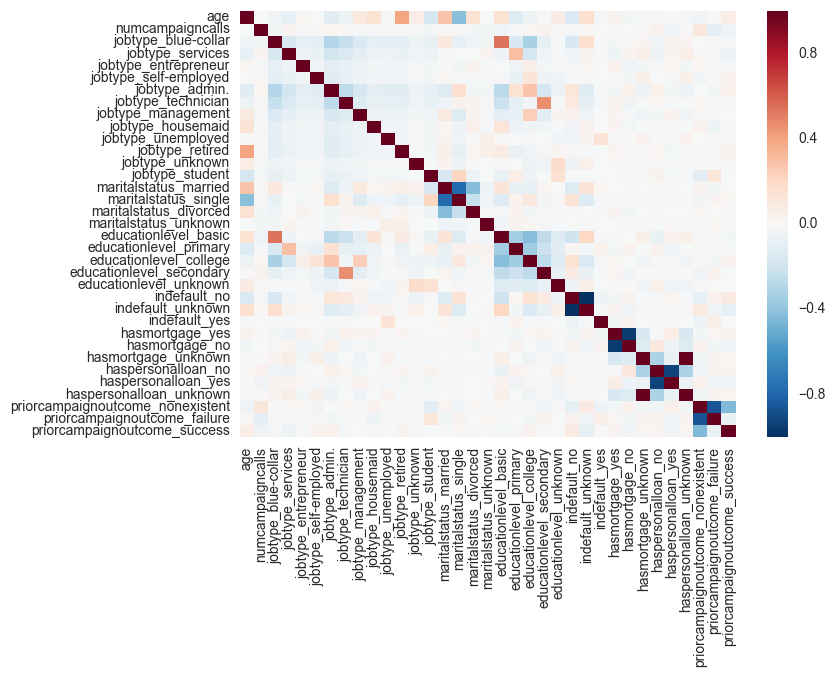

In [17]:
%matplotlib inline
sns.set(font_scale=1.0)
import sns.heatmap(df_bin.corr())

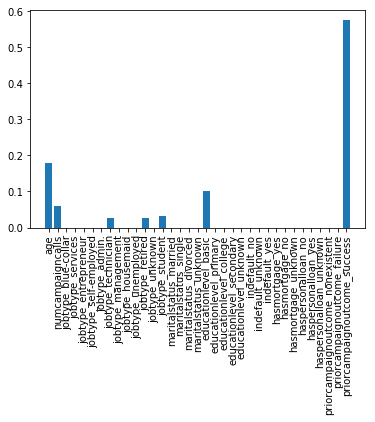

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
categorical_columns = ['jobtype', 'maritalstatus', 'educationlevel', 'indefault',
                       'hasmortgage', 'haspersonalloan', 'priorcampaignoutcome']
df = pd.read_csv('marketing_campaign_train.csv')
df = binarize(df, categorical_columns)
importances = clf.feature_importances_
plt.bar([x for x in range(len(df.columns) - 1)], importances)
plt.xticks([x for x in range(len(df.columns) - 1)], df_bin[[x for x in df_bin.columns if x != 'conversion']].columns, rotation='vertical')
plt.show()